In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

from pandas.plotting import scatter_matrix
import math

# Get the Data

In [2]:
maneuvers = pd.read_csv("maneuvers_cntrl_T2.csv")
#maneuvers.head()

In [3]:
maneuvers.describe()

,x,y,z,dx,dy,dz,dv_st
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1.000000e+03,1000.000000
mean,-0.988844,0.000002,-0.001122,2.631853e-07,-0.009033,-3.334816e-07,0.000003
std,0.000028,0.000029,0.000029,2.981361e-05,0.000029,2.935603e-05,0.000091
min,-0.988893,-0.000050,-0.001171,-4.997581e-05,-0.009083,-4.984044e-05,-0.000205
25%,-0.988867,-0.000024,-0.001147,-2.570116e-05,-0.009057,-2.714025e-05,-0.000068
50%,-0.988844,0.000001,-0.001122,1.589765e-06,-0.009032,4.213820e-07,0.000004
75%,-0.988819,0.000028,-0.001097,2.673642e-05,-0.009009,2.622800e-05,0.000075
max,-0.988793,0.000050,-0.001071,4.993751e-05,-0.008984,4.984212e-05,0.000222


Notice that dv_vel varies in the range -2e-7 to 1e-7, while dv_st varies in the range -7e-9 to 4e-9, so the MOST COSTLY maneuvers are much larger using CORRECTION_VEL method than using CORRECTION_ST !!

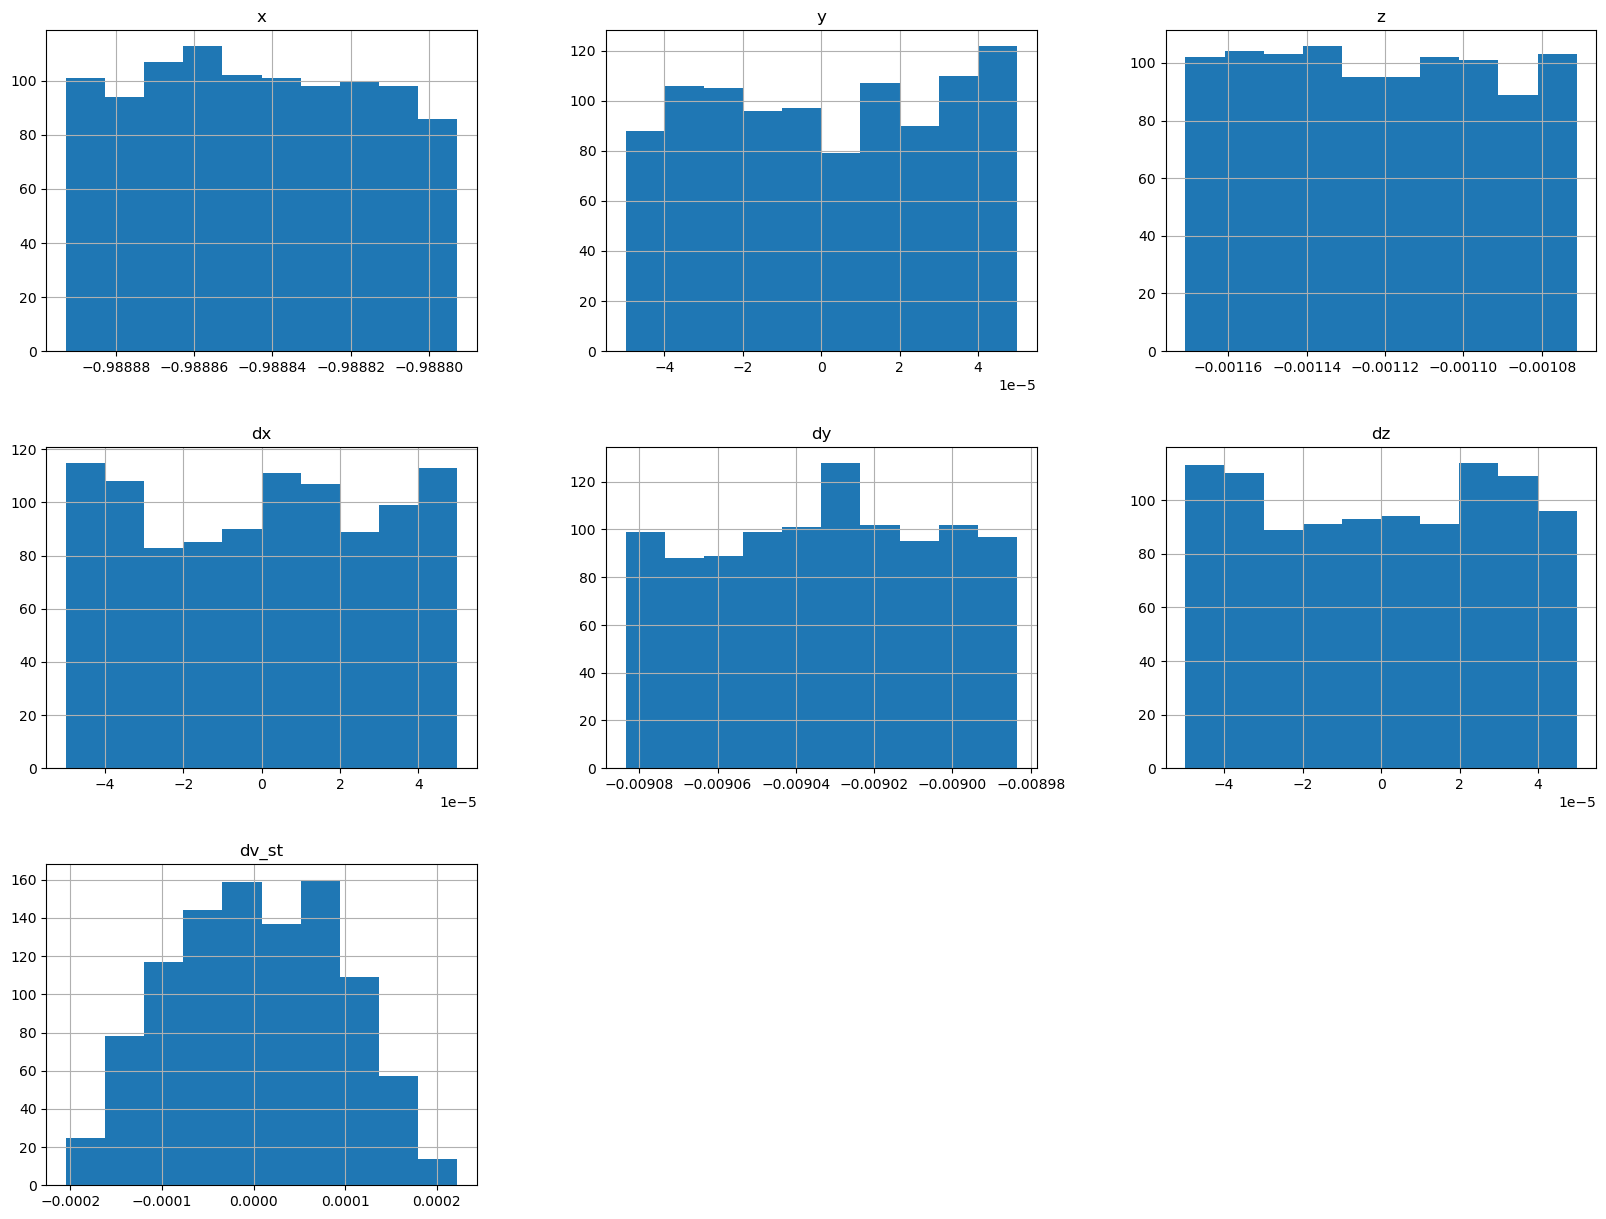

In [4]:
maneuvers.hist(figsize=(20,15))
plt.show()

Histograms of attributes (x,y,z,dx,dy,dz) are tail heavy. We may need to transform to polar coords, or use angle in p.o. as extra attribute.

## Visualizing Data

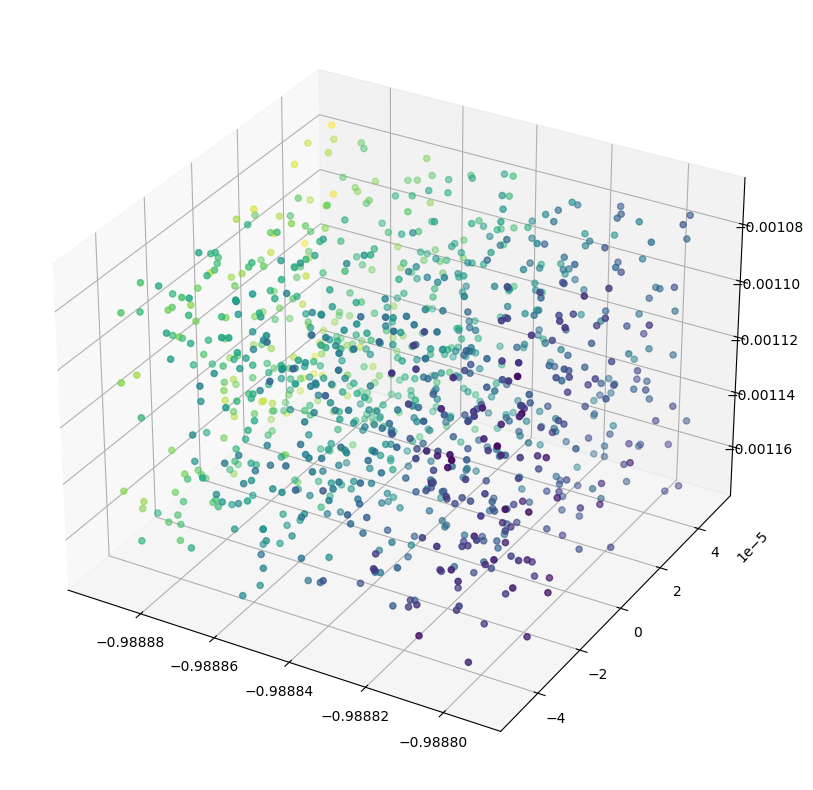

In [5]:
# Visualize shadowing orbit in position space, i.e. the points where correction
# maneuvers are performed.

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(maneuvers['x'], maneuvers['y'], maneuvers['z'], c=maneuvers['dv_st'])
plt.show()

Try adding new attribute "angle" = angle in the periodic orbit, which is essentially time/period.

In [6]:
#maneuvers["angle"]=maneuvers["t"].apply(lambda x: math.fmod(x, 0.3059226605957322E+01))
#maneuvers = maneuvers.drop(["t"], axis=1)
corr_matrix = maneuvers.corr()
corr_matrix["dv_st"].sort_values(ascending=False)

dv_st    1.000000
y        0.290659
dz       0.022213
z        0.021207
dy      -0.074550
dx      -0.331055
x       -0.901477
Name: dv_st, dtype: float64

array([[<Axes: xlabel='x', ylabel='x'>, <Axes: xlabel='y', ylabel='x'>,
        <Axes: xlabel='dx', ylabel='x'>, <Axes: xlabel='dy', ylabel='x'>,
        <Axes: xlabel='dv_st', ylabel='x'>],
       [<Axes: xlabel='x', ylabel='y'>, <Axes: xlabel='y', ylabel='y'>,
        <Axes: xlabel='dx', ylabel='y'>, <Axes: xlabel='dy', ylabel='y'>,
        <Axes: xlabel='dv_st', ylabel='y'>],
       [<Axes: xlabel='x', ylabel='dx'>, <Axes: xlabel='y', ylabel='dx'>,
        <Axes: xlabel='dx', ylabel='dx'>,
        <Axes: xlabel='dy', ylabel='dx'>,
        <Axes: xlabel='dv_st', ylabel='dx'>],
       [<Axes: xlabel='x', ylabel='dy'>, <Axes: xlabel='y', ylabel='dy'>,
        <Axes: xlabel='dx', ylabel='dy'>,
        <Axes: xlabel='dy', ylabel='dy'>,
        <Axes: xlabel='dv_st', ylabel='dy'>],
       [<Axes: xlabel='x', ylabel='dv_st'>,
        <Axes: xlabel='y', ylabel='dv_st'>,
        <Axes: xlabel='dx', ylabel='dv_st'>,
        <Axes: xlabel='dy', ylabel='dv_st'>,
        <Axes: xlabel='dv_st', y

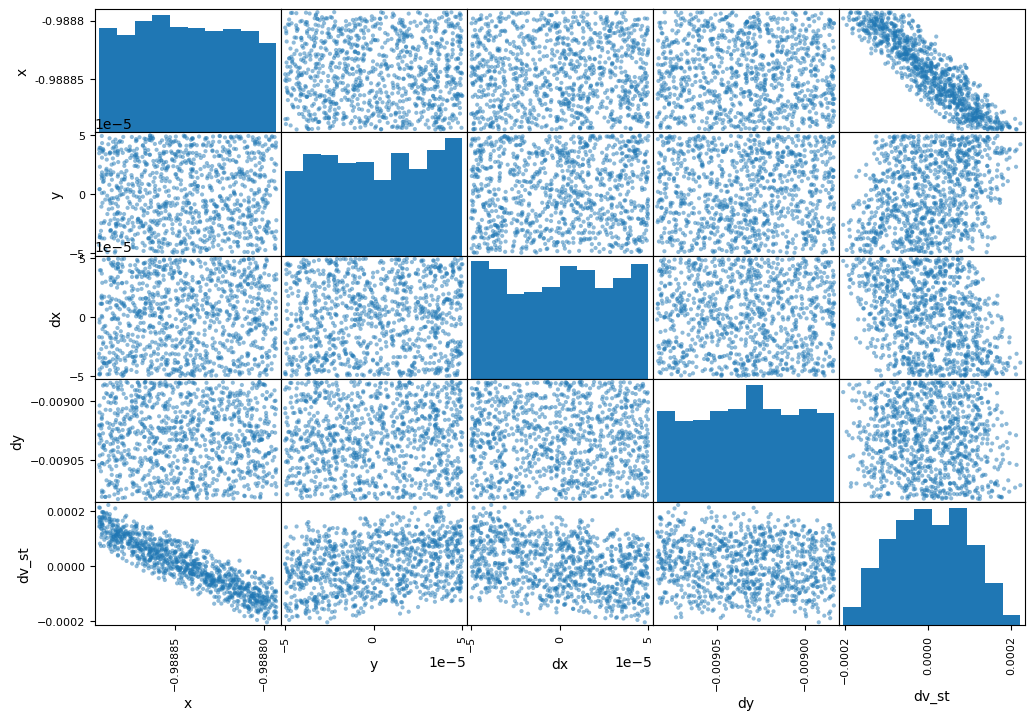

In [7]:
#attributes = ["angle", "x", "dx", "dv_st"]
attributes = ["x", "y", "dx", "dy", "dv_st"]
scatter_matrix(maneuvers[attributes], figsize=(12, 8))

dv_st is either positively or negatively correlated to state variables (x,y,z,dx,dy,dz) !!

Notice that angle and dv_st are not correlated, but they are nonlinearly related ("V" shape) !!

y, dx and dz are perfectly correlated!!!

# Prepare the Data for Machine Learning Algorithms

## Create a Train/Test Set

In [8]:
# Let's separate the predictors and the labels

# Drop dx and dz features, since they are almost proportional to y
#maneuvers_predictors = maneuvers.drop(["dx", "dz", "dv_st"], axis=1)

maneuvers_predictors = maneuvers.drop("dv_st", axis=1)
maneuvers_labels = maneuvers[["dv_st"]].copy()
maneuvers_predictors.head()
#maneuvers_labels.head()

,x,y,z,dx,dy,dz
0,-0.988833,-0.000036,-0.001145,-0.000011,-0.009037,-0.000032
1,-0.988833,0.000023,-0.001086,-0.000044,-0.008995,0.000017
2,-0.988887,0.000034,-0.001145,-0.000016,-0.009056,-0.000048
3,-0.988850,-0.000047,-0.001078,0.000038,-0.009070,-0.000048
4,-0.988801,-0.000041,-0.001130,-0.000033,-0.009033,0.000028


## Create Train/Test/Validation Sets

In [9]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
maneuvers_predictors, maneuvers_labels, test_size=0.2, random_state=1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)
X_train.head()

(600, 6)
(200, 6)
(200, 6)


,x,y,z,dx,dy,dz
336,-0.988847,-0.000042,-0.001094,-0.000042,-0.009061,0.000024
320,-0.988825,-0.000021,-0.001137,0.000047,-0.009047,-0.000003
953,-0.988799,-0.000032,-0.001155,-0.000045,-0.009010,-0.000023
123,-0.988841,0.000040,-0.001091,-0.000014,-0.009044,0.000044
708,-0.988854,0.000043,-0.001144,0.000044,-0.009079,0.000029


In [10]:
# Scale all the features. This transforms data type from dataframe to numpy array.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)
X_train_scaled[:5]

array([[0.46145652, 0.07939122, 0.76655978, 0.07318477, 0.22132524,
        0.74321453],
       [0.6770056 , 0.28813107, 0.3350552 , 0.97082004, 0.36068873,
        0.47353032],
       [0.94208397, 0.18414404, 0.1537974 , 0.04645781, 0.73608791,
        0.26965594],
       [0.51679915, 0.90747128, 0.79775849, 0.36025451, 0.39432418,
        0.94478821],
       [0.38299352, 0.93798659, 0.26416796, 0.944224  , 0.04855175,
        0.78893605]])

In [11]:
# Try PCA of data
from sklearn.decomposition import PCA
pca_pred = PCA(n_components=2, whiten=True)   # PCA of predictors
principalComponents_pred = pca_pred.fit_transform(X_train_scaled)
print('Explained variability per principal component: {}'.format(pca_pred.explained_variance_ratio_))

# X_train_scaled = pca_pred.transform(X_train_scaled)
# X_valid_scaled = pca_pred.transform(X_valid_scaled)
# X_test_scaled = pca_pred.transform(X_test_scaled)
# X_train_scaled[:5]

Explained variability per principal component: [0.18510694 0.17694406]


In [12]:
# Scale target variable dv_st as well.
# Rationale: dv_st takes very small values (10^{-8}), 
# so MSE may be tiny and not computed properly. Also, NN may converge faster?

scaler_target = MinMaxScaler()
y_train_scaled = scaler_target.fit_transform(y_train)
y_valid_scaled = scaler_target.transform(y_valid)
y_test_scaled = scaler_target.transform(y_test)

<Figure size 640x480 with 0 Axes>

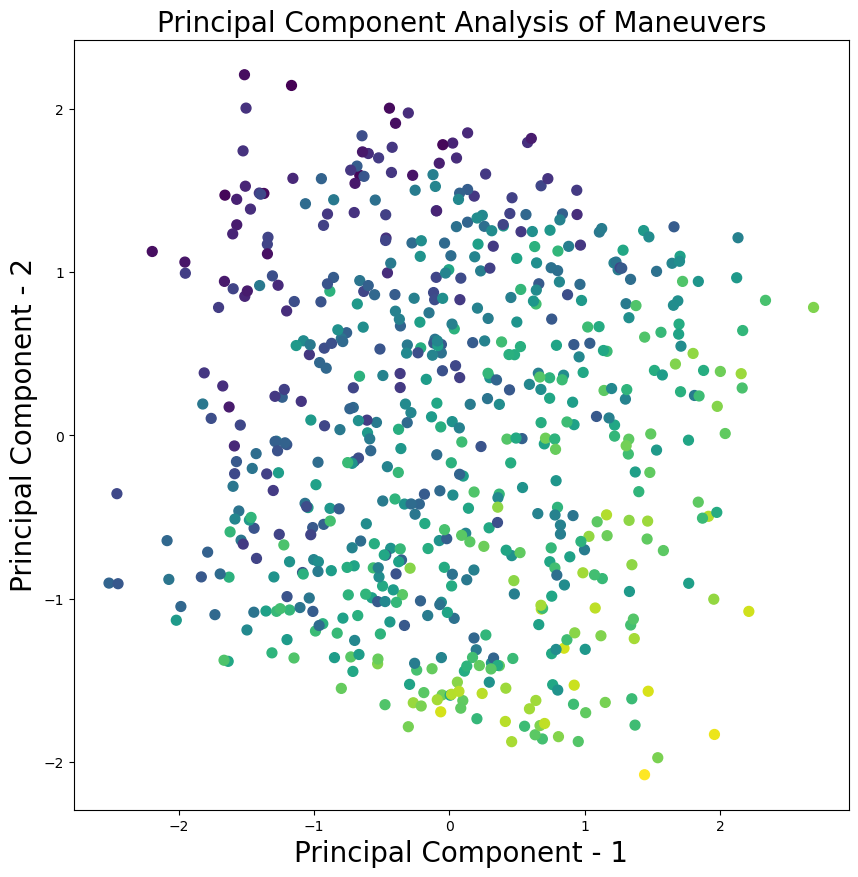

In [13]:
# Plot results of PCA
plt.figure()
plt.figure(figsize=(10,10))
#plt.xticks(fontsize=12)
#plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Maneuvers",fontsize=20)
plt.scatter(principalComponents_pred[:, 0], principalComponents_pred[:, 1], c=y_train_scaled, s = 50)

From the above picture, it is seems that (PC1, PC2) only do not allow to distinguish dv. 

In [14]:
import joblib
joblib.dump(scaler, 'scaler_supervised.gz')
joblib.dump(scaler_target, 'scaler_target_supervised.gz')

['scaler_target_supervised.gz']

# Select and Train a Model

## Training and Evaluating on the Training Set

In [15]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train_scaled)
lin_reg.coef_

array([[-0.67919156,  0.21279906,  0.04083452, -0.22859202, -0.07653071,
         0.007393  ]])

In [16]:
# Let's measure this regression model's RMSE on the whole training set
from sklearn.metrics import mean_squared_error
maneuvers_predictions = lin_reg.predict(X_train_scaled)
lin_mse = mean_squared_error(y_train_scaled, maneuvers_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.0002690513224567887

Clearly not a great score: the SD(dv_st) value is 8.e-7, so a typical prediction error of 6.6.e-7 is not great.

In [17]:
# Let’s train a DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train_scaled, y_train_scaled)

maneuvers_predictions = tree_reg.predict(X_train_scaled)
tree_mse = mean_squared_error(y_train_scaled, maneuvers_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

NOW THIS IS MUCH BETTER!!

In [18]:
#Let's try it out on 5 instances from the test set
some_data = X_test_scaled[10:20]
some_labels = y_test_scaled[10:20]
print("Predictions:", list(tree_reg.predict(some_data)))
print("Labels:", list(some_labels))

Predictions: [0.21494931244525667, 0.4567878136812705, 0.6775075818391925, 0.6775075818391925, 0.44963992534630876, 0.811522033060349, 0.24389045909868634, 0.5721534869408879, 0.6205988835397555, 0.4857320406166652]
Labels: [array([0.27534151]), array([0.45002951]), array([0.65653321]), array([0.61214227]), array([0.44642578]), array([0.8127159]), array([0.28878944]), array([0.56919478]), array([0.62293495]), array([0.47848055])]


In [19]:
# Let’s train a RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train_scaled, y_train_scaled)

maneuvers_predictions = forest_reg.predict(X_train_scaled)
forest_mse = mean_squared_error(y_train_scaled, maneuvers_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

/home/pablo/anaconda3/envs/halo/lib/python3.12/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.012403791681858598

## Polynomial Regression

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
maneuvers_pred_poly = poly_features.fit_transform(X_train_scaled)
#print(X_train_scaled.head())
print(maneuvers_pred_poly[0])
#poly_features.get_feature_names_out(['x','y','z','dy'])

[0.46145652 0.07939122 0.76655978 0.07318477 0.22132524 0.74321453
 0.21294212 0.0366356  0.35373401 0.03377159 0.10213197 0.34296119
 0.00630297 0.06085812 0.00581023 0.01757128 0.05900471 0.58761389
 0.0561005  0.16965902 0.56971836 0.00535601 0.01619764 0.05439198
 0.04898486 0.16449213 0.55236783]


In [21]:
my_lin_reg = LinearRegression()
my_lin_reg.fit(maneuvers_pred_poly, y_train_scaled)
print(my_lin_reg.coef_)
maneuvers_predictions = my_lin_reg.predict(maneuvers_pred_poly)
lin_mse = mean_squared_error(y_train_scaled, maneuvers_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

[[-6.80095513e-01  2.15498634e-01  4.33489385e-02 -2.28964868e-01
  -7.58989767e-02  8.04121588e-03  1.73368290e-03 -6.07310684e-04
  -7.35398502e-04  1.86311108e-04 -3.50491478e-04 -4.89721874e-05
  -2.12337540e-03  1.25518532e-05  4.40480768e-04 -8.27025670e-04
   1.21382502e-05 -1.76818610e-03 -8.08051484e-06  1.45428236e-05
  -6.47277694e-04 -5.33378307e-05  1.99618931e-04 -1.03558257e-05
  -1.86049388e-04  2.00141303e-05 -3.19465960e-04]]


1.1730479429842642e-06

## SVM Regression

In [22]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2)
svm_poly_reg.fit(X_train_scaled, y_train_scaled)
maneuvers_predictions = svm_poly_reg.predict(X_train_scaled)
svm_mse = mean_squared_error(y_train_scaled, maneuvers_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

/home/pablo/anaconda3/envs/halo/lib/python3.12/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.050230809665900766

## Cross-validation

Scikit-Learn’s K-fold cross-validation feature. The following code randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates the Random Forest model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array containing the 10 evaluation scores.

In [23]:
from sklearn.model_selection import cross_val_score
#tree_reg = DecisionTreeRegressor()
#forest_reg = RandomForestRegressor()
lin_reg = LinearRegression()
scores = cross_val_score(lin_reg, maneuvers_pred_poly, y_train_scaled,
scoring="neg_root_mean_squared_error", cv=5)
poly_rmse_scores = -scores

In [24]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(poly_rmse_scores)

Scores: [1.25156785e-06 1.40133859e-06 1.16003470e-06 1.25965873e-06
 1.28560993e-06]
Mean: 1.271641958142147e-06
Standard deviation: 7.748427753204025e-08


## Evaluate Model on Test Set

In [25]:
maneuvers_pred_poly = poly_features.fit_transform(X_test_scaled)
maneuvers_predictions = my_lin_reg.predict(maneuvers_pred_poly)
lin_mse = mean_squared_error(y_test_scaled, maneuvers_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.2425982078135757e-06

## Persist model

In [26]:
# Persist the model for future use (see correction_module.py) without having to retrain.
# Here you can replace pickle with joblib or cloudpickle
from pickle import dump
with open("model_supervised.pkl", "wb") as f:
    dump(my_lin_reg, f, protocol=5)